**Author: Aleyna Alemdar**

In [123]:
from fastai.vision.all import *
import torchvision
import matplotlib.pyplot as plt
import os

***A.1. Download the data***

In [124]:
#download the CIFAR-10 dataset
path = untar_data(URLs.CIFAR)

***A.1.1. Inspect the data layout***

In [125]:
#checking contents of root directory
print("Main folder contents:")
display(path.ls())

#checking paths for training and test folders
train_path = path/'train'
test_path = path/'test'
labels_path = path/'labels.txt'

print("\nTraining data folder:", train_path)
print("Test data folder:", test_path)
print("Labels file:", labels_path)

# listing class folders in training folder
print("\nClass folders in training:")
display(train_path.ls())

# listing class folders in testing folder
print("\nClass folders in testing:")
display(test_path.ls())


Main folder contents:


(#3) [Path('/root/.fastai/data/cifar10/test'),Path('/root/.fastai/data/cifar10/train'),Path('/root/.fastai/data/cifar10/labels.txt')]


Training data folder: /root/.fastai/data/cifar10/train
Test data folder: /root/.fastai/data/cifar10/test
Labels file: /root/.fastai/data/cifar10/labels.txt

Class folders in training:


(#10) [Path('/root/.fastai/data/cifar10/train/airplane'),Path('/root/.fastai/data/cifar10/train/deer'),Path('/root/.fastai/data/cifar10/train/frog'),Path('/root/.fastai/data/cifar10/train/cat'),Path('/root/.fastai/data/cifar10/train/automobile'),Path('/root/.fastai/data/cifar10/train/ship'),Path('/root/.fastai/data/cifar10/train/truck'),Path('/root/.fastai/data/cifar10/train/dog'),Path('/root/.fastai/data/cifar10/train/bird'),Path('/root/.fastai/data/cifar10/train/horse')]


Class folders in testing:


(#10) [Path('/root/.fastai/data/cifar10/test/airplane'),Path('/root/.fastai/data/cifar10/test/deer'),Path('/root/.fastai/data/cifar10/test/frog'),Path('/root/.fastai/data/cifar10/test/cat'),Path('/root/.fastai/data/cifar10/test/automobile'),Path('/root/.fastai/data/cifar10/test/ship'),Path('/root/.fastai/data/cifar10/test/truck'),Path('/root/.fastai/data/cifar10/test/dog'),Path('/root/.fastai/data/cifar10/test/bird'),Path('/root/.fastai/data/cifar10/test/horse')]

In [126]:
from collections import defaultdict

image_count_by_class = defaultdict(int)

for class_folder in train_path.ls():
    count = len(get_image_files(class_folder))
    image_count_by_class[class_folder.name] = count

print("Image counts by class:")
for cls, count in image_count_by_class.items():
    print(f"{cls}: {count} images")

#checking total number of images
total_images = sum(image_count_by_class.values())
print(f"\nTotal number of training images: {total_images}")


Image counts by class:
airplane: 5000 images
deer: 5000 images
frog: 5000 images
cat: 5000 images
automobile: 5000 images
ship: 5000 images
truck: 5000 images
dog: 5000 images
bird: 5000 images
horse: 5000 images

Total number of training images: 50000


44637_airplane.png: (32, 32), format=PNG, mode=RGB


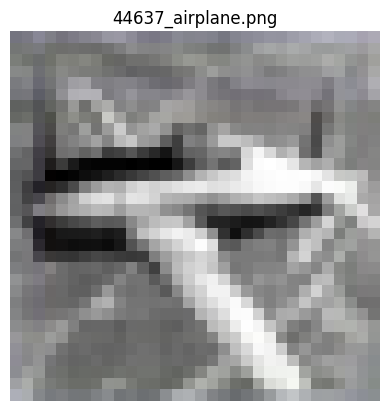

37877_airplane.png: (32, 32), format=PNG, mode=RGB


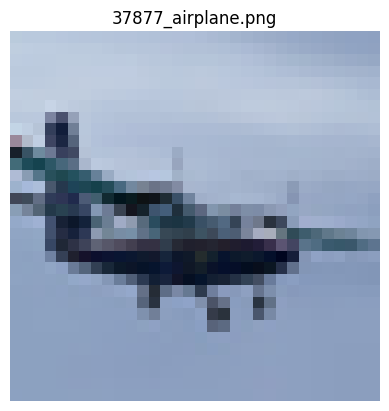

5349_airplane.png: (32, 32), format=PNG, mode=RGB


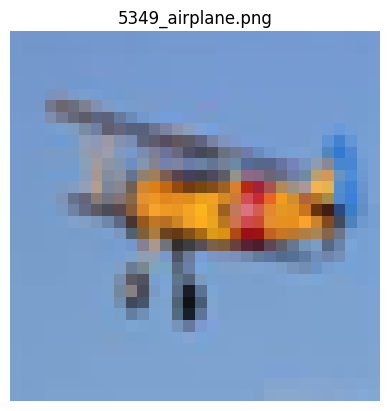

12429_airplane.png: (32, 32), format=PNG, mode=RGB


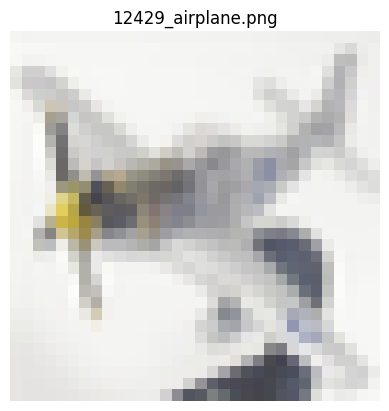

24104_airplane.png: (32, 32), format=PNG, mode=RGB


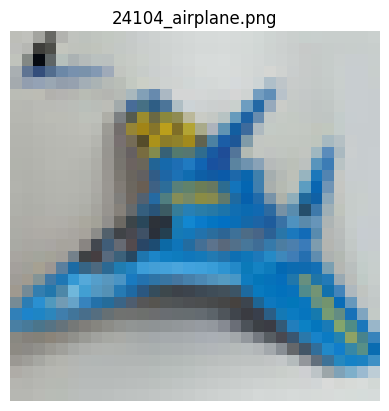

40807_airplane.png: (32, 32), format=PNG, mode=RGB


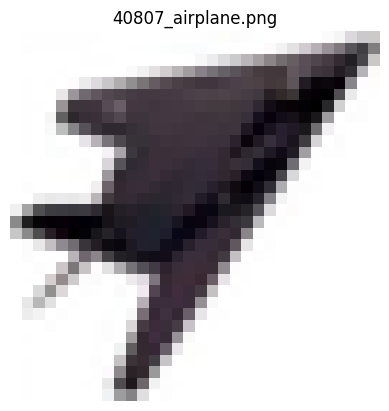

In [127]:
from PIL import Image

# looking some images of first class
sample_imgs = get_image_files(train_path.ls()[0])[:6]

for img_path in sample_imgs:
    img = Image.open(img_path)
    print(f"{img_path.name}: {img.size}, format={img.format}, mode={img.mode}")
    plt.imshow(img)
    plt.title(img_path.name)
    plt.axis('off')
    plt.show()

Total test file count: 10000
359_airplane.png: (32, 32), format=PNG, mode=RGB


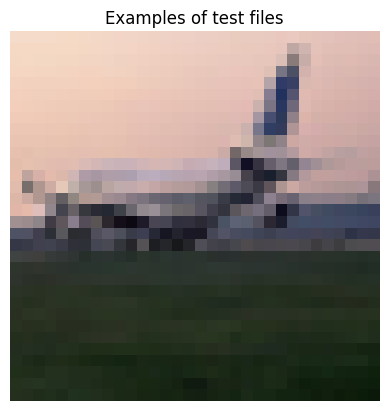

7523_airplane.png: (32, 32), format=PNG, mode=RGB


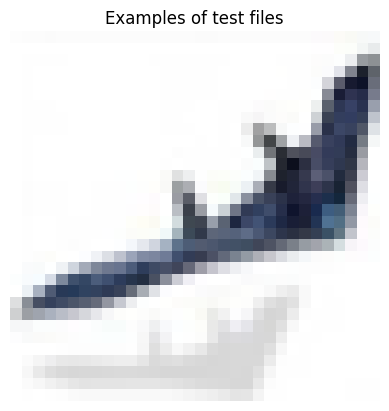

5374_airplane.png: (32, 32), format=PNG, mode=RGB


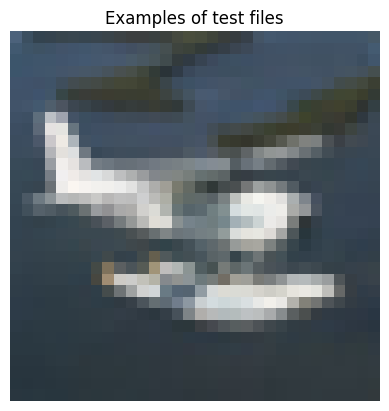

1076_airplane.png: (32, 32), format=PNG, mode=RGB


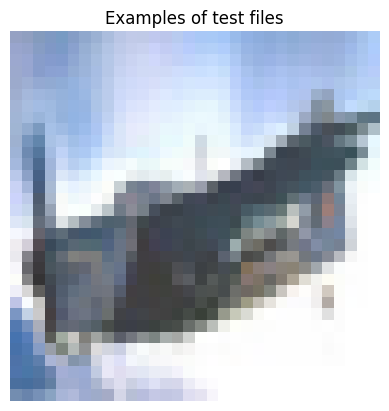

6133_airplane.png: (32, 32), format=PNG, mode=RGB


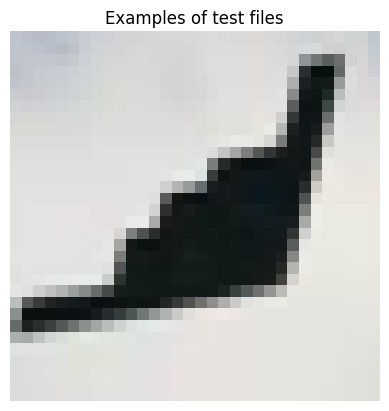

3100_airplane.png: (32, 32), format=PNG, mode=RGB


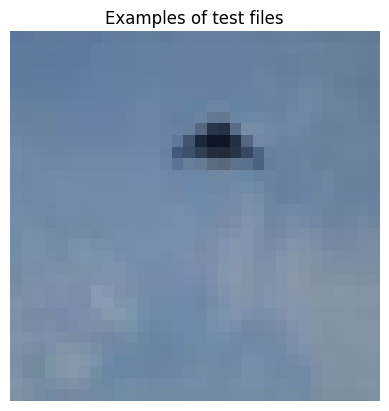

In [129]:
# checking test directory too
test_files = get_image_files(test_path)
print(f"Total test file count: {len(test_files)}")

# visualize some of them
for img_path in test_files[:6]:
    img = Image.open(img_path)
    print(f"{img_path.name}: {img.size}, format={img.format}, mode={img.mode}")
    plt.imshow(img)
    plt.title("Examples of test files")
    plt.axis('off')
    plt.show()


Number of images per class in test data:
airplane: 1000 images
deer: 1000 images
frog: 1000 images
cat: 1000 images
automobile: 1000 images
ship: 1000 images
truck: 1000 images
dog: 1000 images
bird: 1000 images
horse: 1000 images


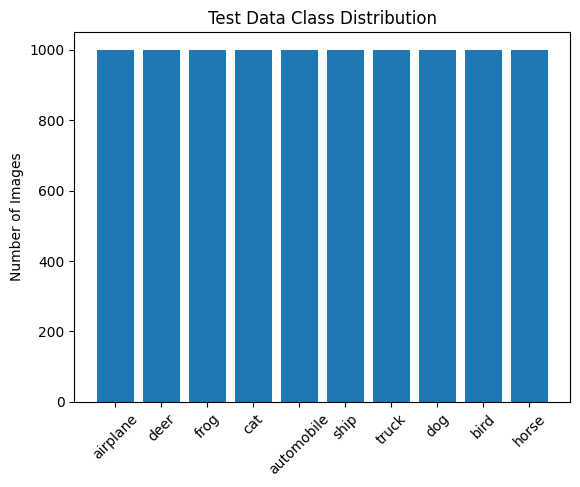

In [130]:
from collections import Counter

test_labels = [img.parent.name for img in test_files]

# distribution of labels
label_counts = Counter(test_labels)
print("Number of images per class in test data:")
for cls, count in label_counts.items():
    print(f"{cls}: {count} images")

# checking for labels are evenly distributed
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(rotation=45)
plt.title("Test Data Class Distribution")
plt.ylabel("Number of Images")
plt.show()

***A.1.2 - Decide how to create the DataBlock***

In [131]:
train_path = path/'train'
train_path.ls()


(#10) [Path('/root/.fastai/data/cifar10/train/airplane'),Path('/root/.fastai/data/cifar10/train/deer'),Path('/root/.fastai/data/cifar10/train/frog'),Path('/root/.fastai/data/cifar10/train/cat'),Path('/root/.fastai/data/cifar10/train/automobile'),Path('/root/.fastai/data/cifar10/train/ship'),Path('/root/.fastai/data/cifar10/train/truck'),Path('/root/.fastai/data/cifar10/train/dog'),Path('/root/.fastai/data/cifar10/train/bird'),Path('/root/.fastai/data/cifar10/train/horse')]

In [132]:
def get_label(file_path):
    return file_path.parent.name

get_label(get_image_files(train_path)[10000])


'frog'

In [133]:
img = Image.open(get_image_files(train_path.ls()[0])[0])
img.show()
print(type(img))


<class 'PIL.PngImagePlugin.PngImageFile'>


***📌 A.2.1: Define the blocks***


In [134]:
blocks = (ImageBlock, CategoryBlock)


***A.2.2: Define the means of getting data into DataBlock***

In [135]:
# getting the images for train directory
items = get_image_files(path/'train')
print(f"Total image count: {len(items)}")
print("Example path:", items[0])


Total image count: 50000
Example path: /root/.fastai/data/cifar10/train/airplane/44637_airplane.png


***A.2.3: Define how to get the attributes***

In [136]:
# get the labels from parent.name
def get_label(file_path):
    return file_path.parent.name

print("Example label:", get_label(items[0]))


Example label: airplane


***A.2.4: Define data transformations***

In [137]:
# Presizing: first bigger size then transforms
item_tfms = Resize(460)  # 460x460
batch_tfms = aug_transforms(size=224, min_scale=0.75)


A Word on Presizing:
- Increase the size (item by item)
- Apply augmentation (batch by batch)
- Decrease the size (batch by batch)
- Presizing avoids artifacts when applying augmentations (e.g., rotation)


In [138]:
cifar_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

dls = cifar_block.dataloaders(path/'train', bs=64)


***A.3 - Inspect the DataBlock via Dataloader***

***A.3.1 Show  batch: dataloader.show_batch()***

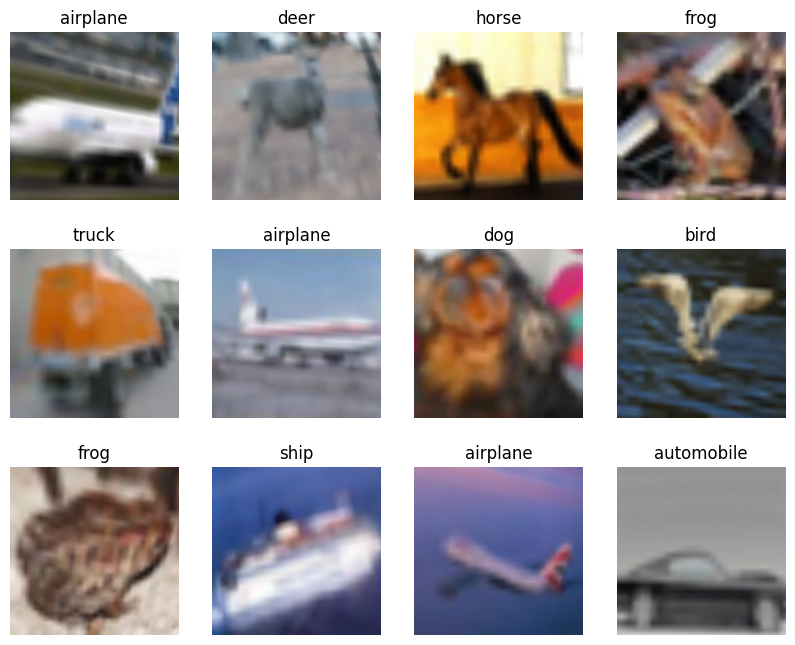

In [139]:
dls.show_batch(max_n=12, figsize=(10, 8))

***A.3.2: Check the labels***

In [140]:
print("Classes in data:")
print(dls.vocab)
print(f"\nTotal class count : {len(dls.vocab)}")


Classes in data:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Total class count : 10


***A.3.3 Summarize the DataBlock: dataloader.summary(path/data)***

In [141]:
cifar_block.summary(path/'train')

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/cifar10/train/automobile/3743_automobile.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: get_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/cifar10/train/automobile/3743_automobile.png
    applying get_label gives
      automobile
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(1))


Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setti

***A.4 - Train a simple model***

***A.4.1 – Create a Benchmark Model***

In [142]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

learn.fine_tune(5, base_lr=0.5)


epoch,train_loss,valid_loss,accuracy,time
0,27.818642,196.060989,0.340300,00:47


epoch,train_loss,valid_loss,accuracy,time
0,3.983287,5728.413574,0.150300,00:50
1,3.392100,2172.319092,0.342000,00:50
2,2.452254,31.276693,0.514300,00:50
3,1.209220,905.953430,0.646000,00:50
4,0.882666,181.012817,0.717300,00:50


***A.4.2 – (Interpret the model)***

In [143]:
# examine model structure
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

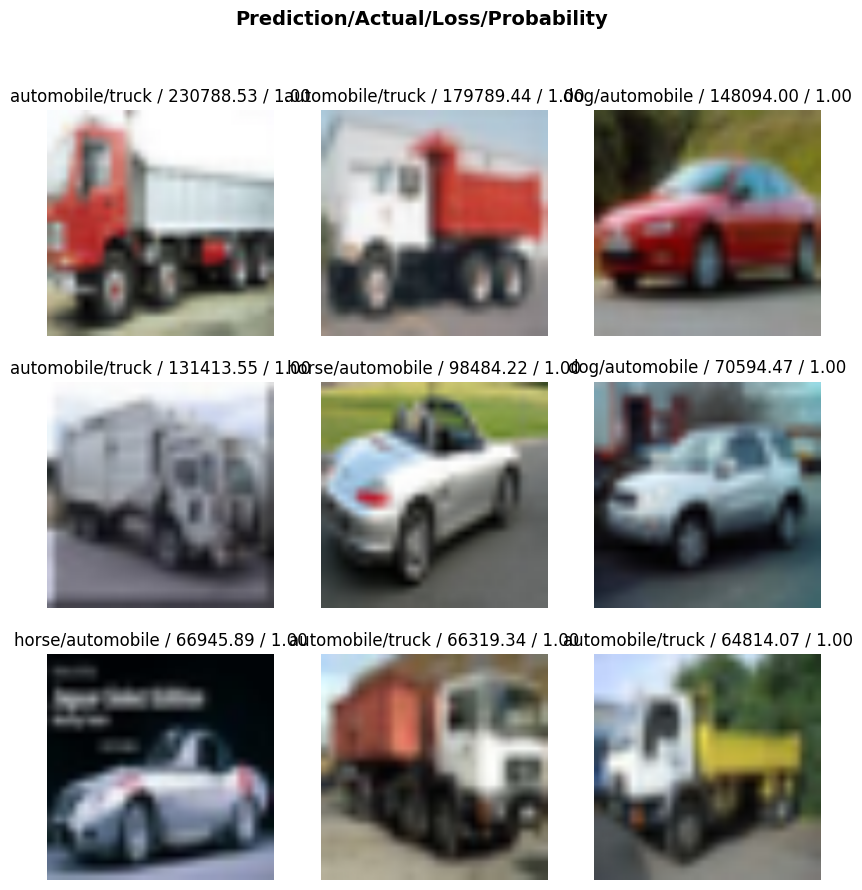

In [144]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(10,10))


***A.4.3 – Confusion Matrix***

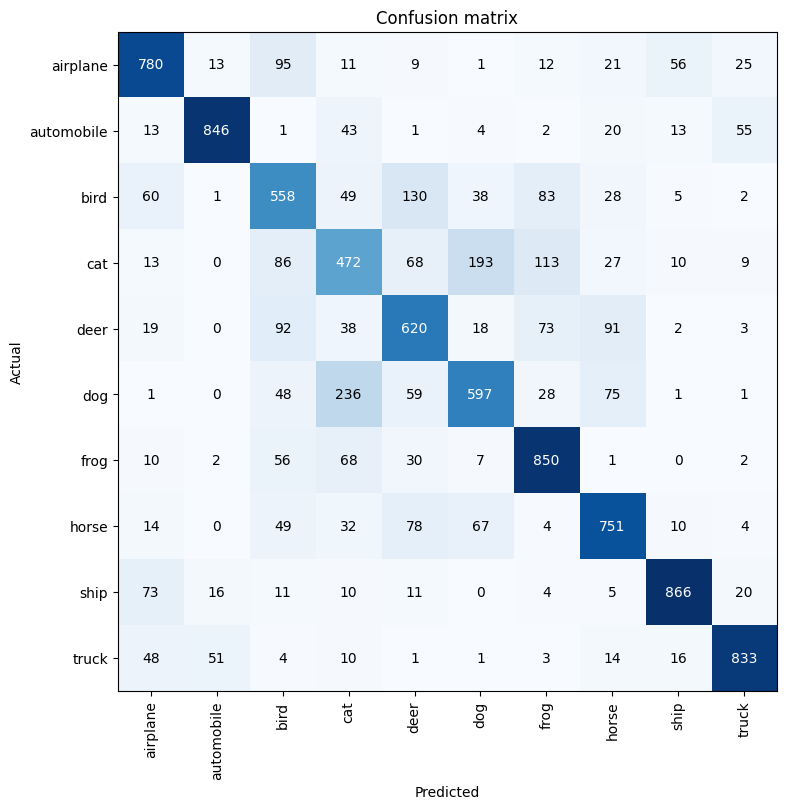

In [145]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)


In [24]:
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")


Validation Accuracy: 0.4725


***B. Advanced Techniques:***

***In this part, we will try some techniques.***

***B.1 – Learning Rate Finder***

SuggestedLRs(valley=0.0012022644514217973)

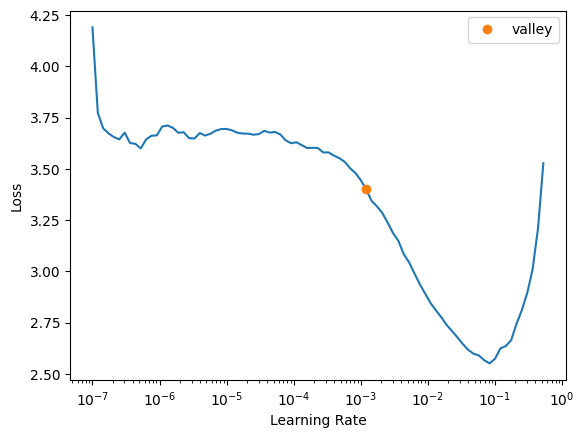

In [30]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time
0,0.845575,0.524284,0.822700,00:47


epoch,train_loss,valid_loss,accuracy,time
0,0.429137,0.279442,0.905000,00:50
1,0.304105,0.220204,0.927600,00:49
2,0.201188,0.187121,0.936700,00:50
3,0.144462,0.163341,0.945100,00:49
4,0.118162,0.159005,0.948700,00:50


Validation Accuracy: 0.9487


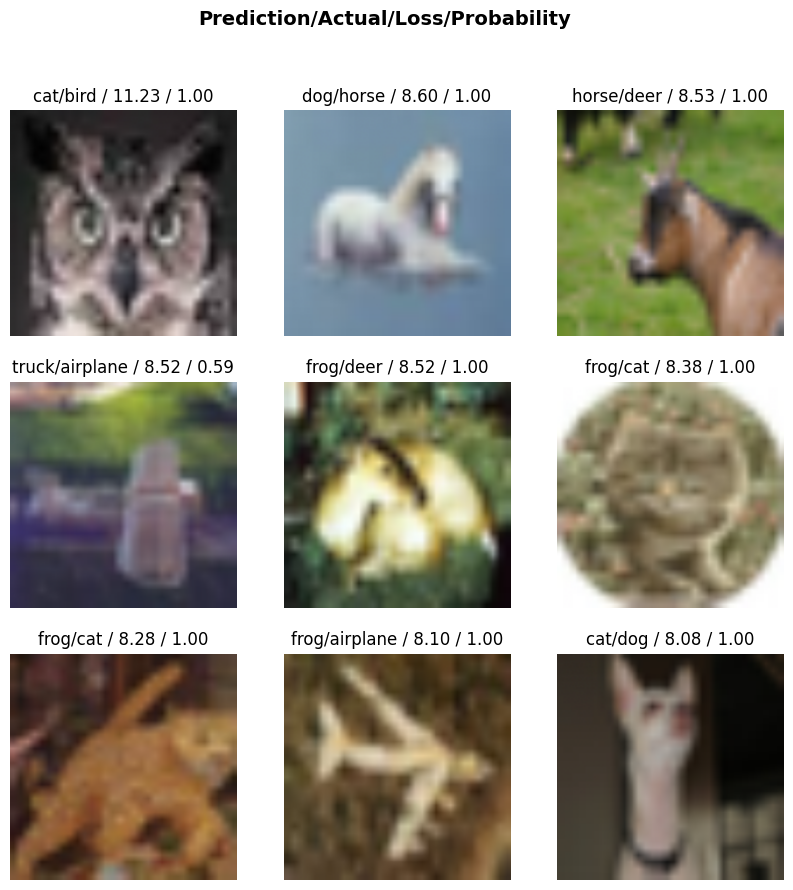

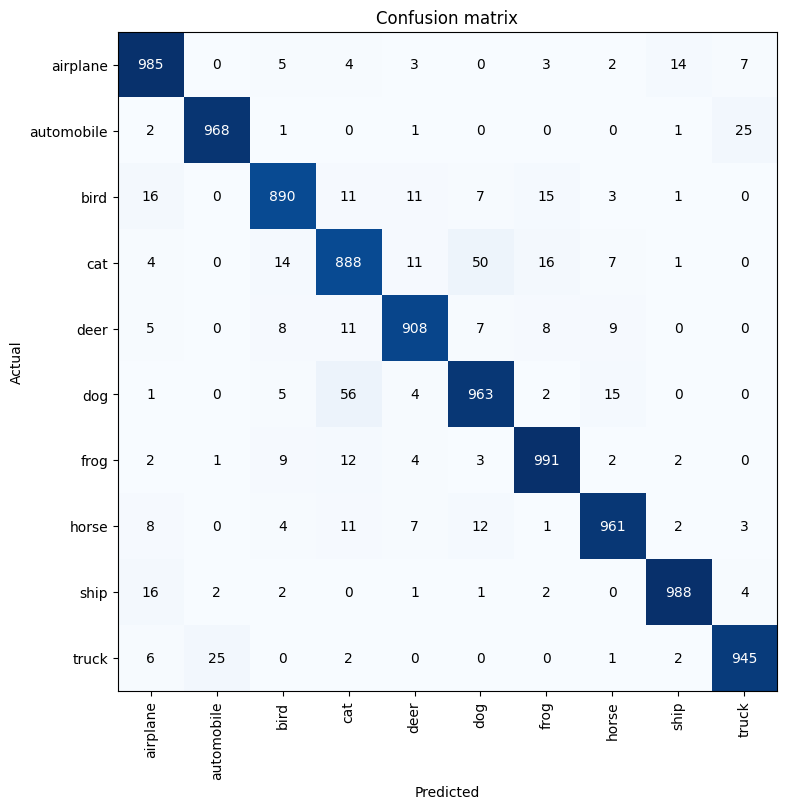

In [37]:
learn.fine_tune(5, base_lr=0.0012022644514217973)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(10,10))
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")

exporting model

In [146]:
learn.export("export.pkl")

***B.1.1 Big lr: Convergence will be poor, if not impossible***

In [38]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3, base_lr=5)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,2565.173096,2893.050293,0.159500,00:47


epoch,train_loss,valid_loss,accuracy,time
0,846.839050,4437217792.000000,0.166400,00:50
1,48.088356,49867.449219,0.173900,00:50
2,2.083509,1705345.750000,0.307500,00:50


Validation Accuracy: 0.3075


***B.1.2 Small lr: Convergence will be slow, takes too much epochs, hence overfitting***

In [57]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3, base_lr=1e-6)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")


epoch,train_loss,valid_loss,accuracy,time
0,3.602425,2.750250,0.121900,00:49


epoch,train_loss,valid_loss,accuracy,time
0,3.501899,2.659529,0.136200,00:51
1,3.429441,2.571032,0.151900,00:50
2,3.347574,2.538895,0.158200,00:50


Validation Accuracy: 0.1582


***B.2. Finder Algorithm:***

***B.2.1*** Start with a very very low lr

***B.2.2*** train one batch with lr, record loss

***B.2.3*** increare lr to 2*lr

***B.2.4***  train one batch with 2*lr, record the new loss

***B.2.5*** if the new loss is smaller than old loss, continue increasing

Step 1: lr=1.00e-10, loss=3.9618
Step 2: lr=2.00e-10, loss=3.9151
Step 3: lr=4.00e-10, loss=3.5004
Step 4: lr=8.00e-10, loss=3.4966
Step 5: lr=1.60e-09, loss=4.0413
Loss Increased, stopped.


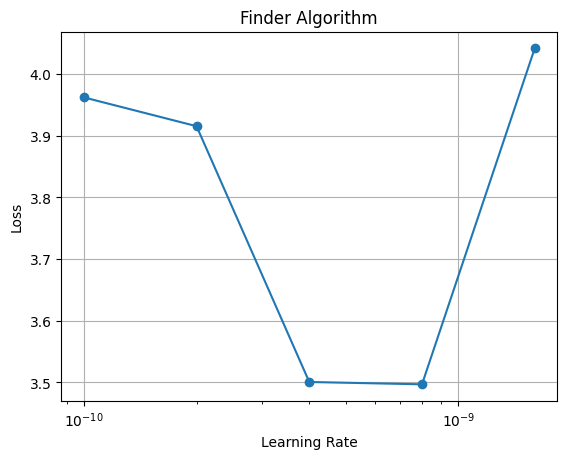

In [85]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.model = learn.model.to(device='cuda')
learn.model.train()

# B.2.1 Start with a very very low lr
lr = 1e-10
lrs = []
losses = []

# B.2.2
xb, yb = dls.one_batch()

# B.2.2
preds = learn.model(xb)
loss = learn.loss_func(preds, yb)

print(f"Step 1: lr={lr:.2e}, loss={loss.item():.4f}")
lrs.append(lr)
losses.append(loss.item())

previous_loss = loss.item()
lr *= 2  # B.2.3
i = 1    #

# B.2.4 & B.2.5
while True:
    learn.opt = learn.opt_func(learn.parameters(), lr=lr)

    preds = learn.model(xb)
    loss = learn.loss_func(preds, yb)

    loss.backward()
    learn.opt.step()
    learn.opt.zero_grad()

    print(f"Step {i+1}: lr={lr:.2e}, loss={loss.item():.4f}")
    lrs.append(lr)
    losses.append(loss.item())

    if loss.item() > previous_loss:
        print("Loss Increased, stopped.")
        break

    previous_loss = loss.item()
    lr *= 2
    i += 1

plt.plot(lrs, losses, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finder Algorithm")
plt.grid(True)
plt.show()


***B.3. Transfer Learning (One or more final linear layers)***

***B.3.*** Old final linear layer F of size mxn (n is the number of classes)

***B.3.*** Replace the trained F with a new one F' of size mxk (k is the number of classes in the new task)

***B.3.*** Only train F' while using the previous weights unchanged (called Freezing)

***B.3.*** Continue training all the weights F' and previous weights (called Unfreezing)

In [86]:
model = resnet18(pretrained=True)

print("Old final linear layer (F):")
print(model.fc)


Old final linear layer (F):
Linear(in_features=512, out_features=1000, bias=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [87]:
num_features = model.fc.in_features

model.fc = nn.Linear(num_features, 10)

print("New final layer (F'):")
print(model.fc)


New final layer (F'):
Linear(in_features=512, out_features=10, bias=True)


In [88]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


In [91]:
for name, param in learn.model.named_parameters():
    if "fc" not in name:
        param.requires_grad = False

learn.fit_one_cycle(3, lr_max=1e-2)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.971524,0.976612,0.719700,00:41
1,0.779075,0.647184,0.794400,00:41
2,0.621173,0.553307,0.811800,00:41


Validation Accuracy: 0.8118


In [92]:
for param in learn.model.parameters():
    param.requires_grad = True

learn.fit_one_cycle(5, lr_max=1e-3)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.661014,0.573887,0.805100,00:48
1,0.636047,0.558561,0.808200,00:48
2,0.631282,0.546185,0.811900,00:48
3,0.617153,0.543935,0.815700,00:49
4,0.607545,0.540067,0.814900,00:49


Validation Accuracy: 0.8149


***B.4. Discriminative Learning Rates***

***B.4.1.*** The early weights are already trained well, we don't need to tweak them much

***B.4.2.*** But the newly added layer contains random weights, so it needs larger tweak to get better suited

***B.4.3.*** Early layers learn simpler (i.e. more general) properties


***B.4.4.*** Whereas, later layers learn mode complex (i.e. more specific) properties

***B.4.5.*** More specific finding might not be that helpful in our different task

***B.4.6.*** So: We can change the weight of the further layers more liberal, compare to the early layers

***B.4.7.*** Fastai uses ULMFIT approach for NLP transfer learning, via lr_max=slice(first_lr,last_lr)

In [111]:
from torchvision.models import resnet18
import torch.nn as nn

learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.unfreeze()

In [112]:
learn.fit_one_cycle(3, lr_max=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.481993,0.309255,0.896800,00:50
1,0.283546,0.209319,0.930200,00:50
2,0.202043,0.181397,0.938300,00:50


In [113]:
for i, group in enumerate(learn.opt.param_groups):
    print(f"Group {i+1} learning rate: {group['lr']:.2e}")


Group 1 learning rate: 1.12e-10
Group 2 learning rate: 1.12e-09
Group 3 learning rate: 1.12e-08


***B.5. Deciding the Number of Training Epochs***

***B.5.1.*** With learning rate finder you just need to retrain your model


***B.5.2.*** Why not early stopping: Because early stopping and learning rate finder counter act each other


***B.5.3.*** That is, we can decide to stop before finding the correct learning rate, which is misleading

SuggestedLRs(valley=0.0002754228771664202)

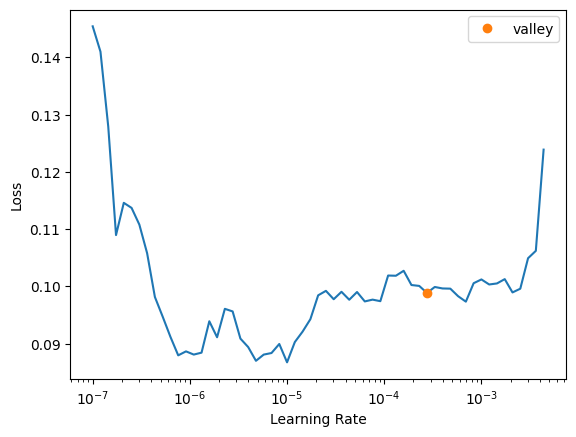

In [100]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

learn.lr_find()

In [114]:
model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

learn.fit_one_cycle(3, lr_max=0.0002754228771664202)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.348801,0.293559,0.899800,00:50
1,0.206137,0.167406,0.944100,00:50
2,0.099155,0.127118,0.956500,00:50


Validation Accuracy: 0.9565


In [115]:
# we will not use the eary stopping this is just a example
from fastai.callback.tracker import EarlyStoppingCallback

learn.fit_one_cycle(4, lr_max=1e-3, cbs=[EarlyStoppingCallback(patience=2)])
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")


epoch,train_loss,valid_loss,accuracy,time
0,0.505851,0.767302,0.756900,00:50
1,0.375175,0.332451,0.891000,00:50
2,0.203701,0.179822,0.938500,00:50
3,0.109006,0.145047,0.951300,00:51


Validation Accuracy: 0.9513


***B.6. Model Capacity***

***B.6.1.*** When increasing the model capacity, make sure that you decrease the batch size



***B.6.2.*** This will ensure that you will not have memory problem in your GPU


***B.6.3.*** You can also train your model with mixed precision (akin to quantization in LLMs)

In [116]:
from torchvision.models import resnet50

small_bs_dls = cifar_block.dataloaders(path/'train', bs=16) #decreased the batch size

model = resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)

learn_big = Learner(small_bs_dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
acc = learn_big.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 215MB/s]


Validation Accuracy: 0.1017


In [117]:
!nvidia-smi

Tue May 20 17:08:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             70W /  400W |    5815MiB /  40960MiB |     22%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [118]:
learn_big.to_fp16()  # mixed precision
learn_big.fine_tune(5, base_lr=1e-3)
acc = learn_big.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,1.026903,0.748836,0.736800,03:33


epoch,train_loss,valid_loss,accuracy,time
0,0.583013,0.511293,0.825900,03:23
1,0.551143,0.447382,0.849800,03:19
2,0.396143,0.324666,0.888700,03:21
3,0.221430,0.230561,0.923800,03:22
4,0.193294,0.192639,0.933600,03:26


Validation Accuracy: 0.9336


***EXTRA NOTES:***
***B.7. Weight Initialization***

***B.7.1 Importance***: Poor initialization (e.g., all zeros) harms gradient flow (vanishing/exploding gradients).



***B.7.2 Xavier/Glorot:*** For sigmoid/tanh (scales weights by 1/sqrt(fan_in)).


***B.7.3 Kaiming/He:*** For ReLU/LeakyReLU (scales by sqrt(2/fan_in)).


***B.7.4 Orthogonal Initialization:*** For RNNs/avoiding redundancy in deep nets.


***B.7.5*** Modern frameworks (PyTorch, fastai) default to Kaiming for ReLU networks.


***B.7.6*** For transfer learning, initial weights are pretrained (less critical).

In [119]:
from torchvision.models import resnet18
import torch.nn as nn

model = resnet18(pretrained=False)

model.fc = nn.Linear(model.fc.in_features, 10)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [120]:
def custom_weight_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

In [121]:
model.apply(custom_weight_init)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [122]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, lr_max=1e-3)
acc = learn.validate()[1]
print(f"Validation Accuracy: {acc:.4f}")


epoch,train_loss,valid_loss,accuracy,time
0,1.239895,1.435465,0.513500,00:52
1,0.879816,0.812144,0.721100,00:52
2,0.653851,0.624865,0.783700,00:51
3,0.506207,0.447379,0.848700,00:52
4,0.410518,0.404978,0.861600,00:51


Validation Accuracy: 0.8616
